<a href="https://colab.research.google.com/github/kitigai/LearnDL/blob/master/DeepNNBasics_BatchNromalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1wAc2z2MujKT3dPoP8Ts8oq2pCx4EFmeo)

Normalization technique Normalizes Mean and Variant in Input layers and improve learning speed. Batch Normalization allows using normalization not only input layer but also any other layers. 


# New Section

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


Using TensorFlow backend.


In [0]:
#load data sample
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


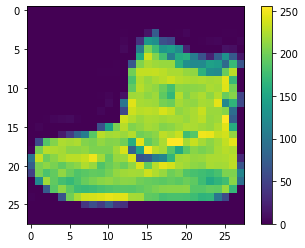

In [0]:
#plot sample image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#shift image values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
#build model that has 1 hidden layer with 128 nodes and has 10 classes output
# apply Dropout to hidden layer to reduce overfitting
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])
#compile
model.compile(
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4997 - accuracy: 0.8217
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3520 - accuracy: 0.8744
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3392 - accuracy: 0.8808
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3319 - accuracy: 0.8830
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3283 - accuracy: 0.8870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3234 - accuracy: 0.8876
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3195 - accuracy: 0.8910
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.8939
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.311

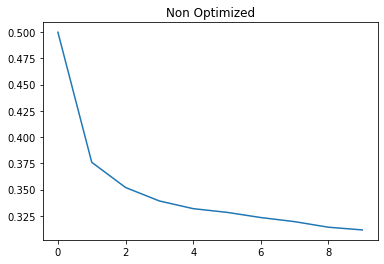

In [0]:
#train model
history = model.fit(train_images, train_labels, epochs=10, verbose=1)
plt.plot(np.squeeze(history.history["loss"]))
plt.title("Non Optimized")
plt.show()

In [0]:
# accuracy test
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nUnOptimized \nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.4283 - accuracy: 0.8746

UnOptimized 
Test accuracy: 0.8745999932289124


Epoch 1/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.5617 - accuracy: 0.7996
Epoch 2/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.4468 - accuracy: 0.8360
Epoch 3/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.4094 - accuracy: 0.8494
Epoch 4/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3863 - accuracy: 0.8571
Epoch 5/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3723 - accuracy: 0.8617
Epoch 6/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3607 - accuracy: 0.8659
Epoch 7/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3542 - accuracy: 0.8675
Epoch 8/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3471 - accuracy: 0.8718
Epoch 9/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3369 - accuracy: 0.8745
Epoch 10/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.334

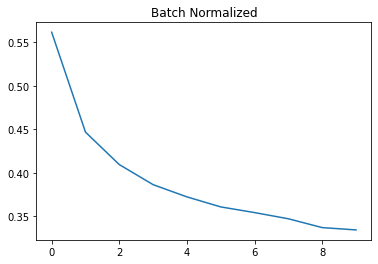

313/313 - 0s - loss: 0.3192 - accuracy: 0.8817

UnOptimized 
Test accuracy: 0.8816999793052673


In [0]:
# make model with Batch Normalization
BN_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10)
])
#compile
BN_model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#train model
history = BN_model.fit(train_images, train_labels, epochs=10, verbose=1, batch_size = 16)
plt.plot(np.squeeze(history.history["loss"]))
plt.title("Batch Normalized")
plt.show()
# accuracy test
test_loss, test_acc = BN_model.evaluate(test_images,  test_labels, verbose=2)
print('\nUnOptimized \nTest accuracy:', test_acc)

In [0]:
# make predict
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
title = class_names[np.argmax(predictions[0])]
plt.figure()
plt.title(title)
plt.imshow(test_images[0])
plt.show()